In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from genetic_algorithm.GeneticAlgorithm import GeneticAlgorithm
from genetic_algorithm.Examples.tgi_indexes import get_tgi, mask_tgi

$\textbf{Simple example}$

In [2]:
def simple_func(x: float, y: float) -> float:
    return -(x + 100) ** 8 - (y - 0.98765)**2

In [3]:
gen_alg: GeneticAlgorithm = GeneticAlgorithm(simple_func, dim=2, initial_population_bound=np.array([100000, 1000]), 
                           population_count=20)
gen_alg.run()

iteration 0
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 1: 0.001904 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 2: 0.001865 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 3: 0.002592 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 4: 0.002106 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 5: 0.001076 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 6: 0.000862 sec.
best sample: [ 337.55544515 -862.92796245] 	best function value: -1.3435837488107068e+21
duration of iteration 7: 0.001102 sec.
best sample: [-261.95026926  539.76818778] 	best function value: -4.732094350628329e+17
dura

/tmp/ipykernel_124441/1181290542.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot( np.array(gen_alg.get_history())[:,2], label = 'best function value in population')


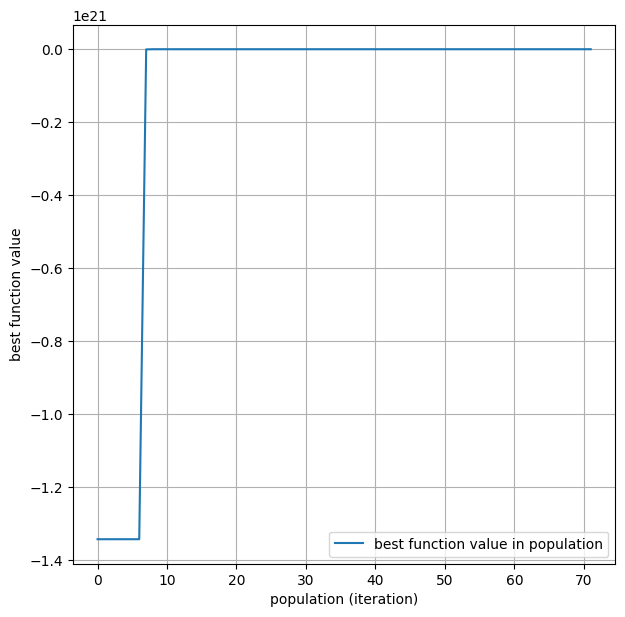

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot( np.array(gen_alg.get_history())[:,2], label = 'best function value in population')
plt.xlabel('population (iteration)')
plt.ylabel('best function value')
ax.legend()
ax.grid()
plt.show()

$\textbf{TGI indexes}$

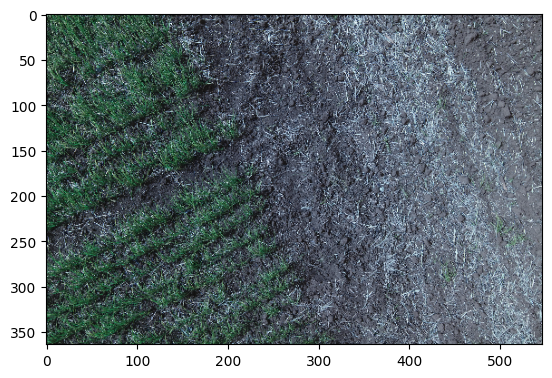

In [5]:
img: np.ndarray = cv2.imread('IMG.JPG')
img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), cv2.INTER_NEAREST)
plt.imshow(img)

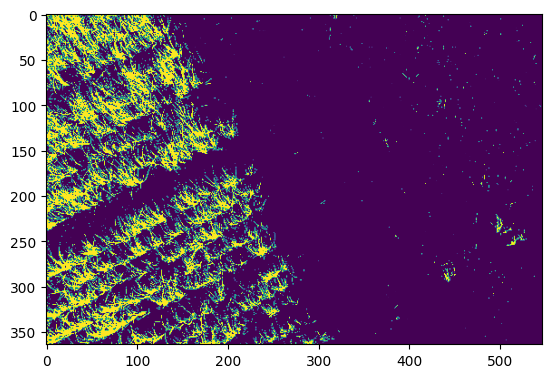

In [6]:
mask: np.ndarray = cv2.imread('MASK.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]), cv2.INTER_NEAREST)
plt.imshow(mask)

In [7]:
gen_alg: GeneticAlgorithm = get_tgi(img, mask)

iteration 0
best sample: [-0.91737485 -0.48024552  1.72242529] 	best function value: 0.6028245090868171
duration of iteration 1: 2.09589 sec.
best sample: [ 0.7122666  -1.62900647  8.00187597] 	best function value: 0.7073150364638423
duration of iteration 2: 2.15335 sec.
best sample: [ 0.71226667 -1.62900663  8.00187676] 	best function value: 0.7073150364638423
duration of iteration 3: 2.216776 sec.
best sample: [ 0.71226667 -1.62900663  8.00187676] 	best function value: 0.7073150364638423
duration of iteration 4: 2.20622 sec.
best sample: [ 0.71226667 -1.62900663  8.00187676] 	best function value: 0.7073150364638423
duration of iteration 5: 2.119778 sec.
best sample: [ 0.71226661 -1.62900648  8.00187604] 	best function value: 0.7073150364638423
duration of iteration 6: 2.14605 sec.
best sample: [ 0.71226661 -1.62900648  8.00187604] 	best function value: 0.7073150364638423
duration of iteration 7: 2.13967 sec.
best sample: [-0.56316854 -0.5859601   5.30603891] 	best function value: 0.8

Best sample (blue, red, threshold)

In [8]:
gen_alg.best_sample

array([-0.25829002, -0.75580231, 11.20583251])

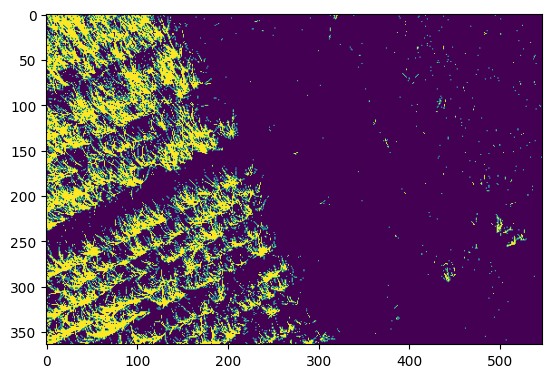

In [9]:
plt.imshow(mask_tgi(img, *gen_alg.best_sample))

/tmp/ipykernel_124441/1002928187.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot( np.array(gen_alg.get_history())[:,2], label = 'best jaccard score value in population')


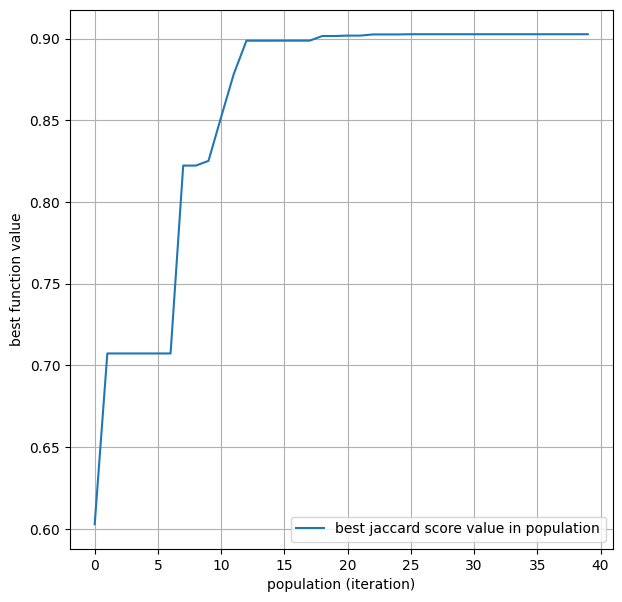

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot( np.array(gen_alg.get_history())[:,2], label = 'best jaccard score value in population')
plt.xlabel('population (iteration)')
plt.ylabel('best jaccard score value')
ax.legend()
ax.grid()
plt.show()